# Biden and Obama Twitter Analysis
## Killa Hnatko (Project)
[Joe Biden](https://twitter.com/JoeBiden) 
[Barack Obama](https://twitter.com/BarackObama) 

Analysis of Biden and Obama use of social media (twitter), first was to scrape 100 tweets and study the reaction of responses as well. (These will be from this time which is from 08/2021)

## Twitter Scraping
Scrape their tweets on Twitterm, through = [Twitter developer](https://developer.twitter.com/en) then access Twitter [Tweepy]


In [19]:
import tweepy
import time
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS
import re

consumer_key = "I cannot show my key and secret"
consumer_secret = "but to make this snippet of code work"
access_token = "you can apply to be a twitter developer"
access_token_secret = "you will have your own key and secret"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/killahnatko/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Now, we can use the API we just built to query the Twitter library and scrape their tweets

In [68]:
# The name of their Twitter accounts
biden = "JoeBiden"

# To get 100 tweets
count = 100
 
# Creation of query method using parameters
biden_tweets = tweepy.Cursor(api.user_timeline,id=biden).items(count)
#create list with needed information 
biden_tweets_list = [[tweet.created_at, tweet.text, tweet.retweet_count, tweet.favorite_count] 
                     for tweet in biden_tweets]
#create df
tweets_biden = pd.DataFrame(biden_tweets_list, columns = ["time stamp", "tweet", "retweets","favorites"])



tweets_biden

,time stamp,tweet,retweets,favorites
0,2021-08-04 16:01:00,"RT @POTUS: Happy birthday, @BarackObama. I’m p...",10831,0
1,2021-08-03 21:59:00,Workers shouldn’t just compete for jobs. Jobs ...,1477,11579
2,2021-08-02 19:55:55,RT @POTUS: We are prepared to deal with the su...,6814,0
3,2021-08-01 20:09:00,It’s past time the super wealthy and profitabl...,2113,15892
4,2021-08-01 15:51:01,"If you’re worried about the Delta variant, the...",6380,43630
...,...,...,...,...
95,2021-05-28 01:07:55,This is our moment to rebuild an economy from ...,5090,44417
96,2021-05-27 22:14:02,The Biden economic plan is working. https://t....,1904,16442
97,2021-05-27 18:20:08,RT @POTUS: Tune in as I deliver remarks on our...,1178,0
98,2021-05-26 23:22:52,RT @POTUS: We are still awaiting many of the d...,7697,0


In [42]:
# The name of their Twitter accounts
obama = "BarackObama"

# To get 100 tweets
count = 100
 
# Creation of query method using parameters
obama_tweets = tweepy.Cursor(api.user_timeline,id=obama).items(count)

#create list with needed information 
obama_tweets_list = [[tweet.created_at, tweet.text, tweet.retweet_count, tweet.favorite_count] 
                     for tweet in obama_tweets]
#create df 
tweets_obama = pd.DataFrame(obama_tweets_list, columns = ["time stamp", "tweet", "retweets","favorites"])



tweets_obama

,time stamp,tweet,retweets,favorites
0,2021-07-29 22:29:46,"RT @ObamaFoundation: Happy birthday, Mrs. Robi...",1309,0
1,2021-07-27 21:32:56,One of the things I’ve always loved about bask...,2099,18009
2,2021-07-26 20:37:23,"COVID-19 has gotten more contagious, so it’s m...",5019,30397
3,2021-07-26 00:16:38,Bob Moses was a hero of mine. His quiet confid...,3310,41487
4,2021-07-23 23:30:53,I could not be prouder of the incredible athle...,3665,60336
...,...,...,...,...
95,2021-03-23 18:01:40,The American Rescue Plan lowers premiums for m...,823,9279
96,2021-03-23 18:01:40,"And now, thanks to the hard work of President ...",278,2164
97,2021-03-23 18:01:39,But I’ve always said that the ACA is like a st...,297,2017
98,2021-03-23 18:01:39,The Affordable Care Act has helped 20 million ...,362,2071


## Analysis Biden and obama Tweets
### Frequency
Let us see when the first and 100th tweets of Biden and Obama 

In [69]:
print(f'Biden: His latest tweet was sent on {tweets_biden.loc[0]["time stamp"]}. \nthe 100th tweet was sent on {tweets_biden.loc[99]["time stamp"]}.\nIt took {tweets_biden.loc[0]["time stamp"]-tweets_biden.loc[49]["time stamp"]} for Biden to send 100 tweets.')
print(f'Obama: His latest tweet was sent on {tweets_obama.loc[0]["time stamp"]}. \nthe 100th tweet was sent on {tweets_obama.loc[99]["time stamp"]}.\nIt took {tweets_obama.loc[0]["time stamp"]-tweets_obama.loc[49]["time stamp"]} for Obama to send 100 tweets.')

Biden: His latest tweet was sent on 2021-08-04 16:01:00. 
the 100th tweet was sent on 2021-05-26 20:48:08.
It took 44 days 01:55:58 for Biden to send 100 tweets.
Obama: His latest tweet was sent on 2021-07-29 22:29:46. 
the 100th tweet was sent on 2021-03-23 18:01:38.
It took 65 days 07:29:39 for Obama to send 100 tweets.


Let us see how often they tweeted.

In [46]:
print(f'According to the recent data, Biden will send a tweet every {int(((tweets_biden.loc[0]["time stamp"]-tweets_biden.loc[99]["time stamp"]).total_seconds()/50)%60)} minutes')
print(f'According to the recent data, Obama will send a tweet every {int(((tweets_biden.loc[0]["time stamp"]-tweets_obama.loc[99]["time stamp"]).total_seconds()/50)%60)} minutes')

According to the recent data, Biden will send a tweet every 15 minutes
According to the recent data, Obama will send a tweet every 47 minutes


In the past two months Biden has sent a tweet every 15 minutes and obama has sent one every 47 minutes
### Reweets and Favorites
We can visualize and compare the 2 presidents' numbers of retweets and favorites of each tweet, to observe how welcomed they are on Twitter.

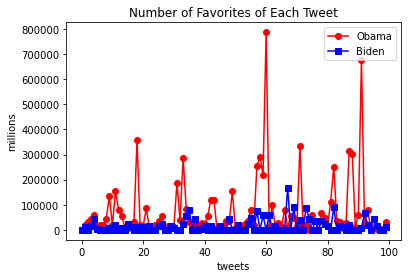

In [50]:
plt.plot(tweets_obama.index, tweets_obama.favorites, c='r', marker='o', label='Obama')
plt.plot(tweets_biden.index, tweets_biden.favorites, c='b', marker='s', label='Biden')
plt.legend(loc='upper right')
plt.title('Number of Favorites of Each Tweet')
plt.xlabel('tweets')
plt.ylabel('millions')
plt.show()

In [51]:
    print(f'Biden has {sum(tweets_biden.favorites)} favorites in total and {int(sum(tweets_biden.favorites)/100)} favorites per tweet. \nObama has {sum(tweets_obama.favorites)} favorites in total and {int(sum(tweets_obama.favorites)/100)} favorites per tweet.')

Biden has 1683259 favorites in total and 16832 favorites per tweet. 
Obama has 7437158 favorites in total and 74371 favorites per tweet.


In [72]:
print(f'Biden has {sum(tweets_biden.retweets)} retweets in total and {int(sum(tweets_biden.retweets)/100)} retweets per tweet. \nObama has {sum(tweets_obama.retweets)} retweets in total and {int(sum(tweets_obama.retweets)/100)} retweets per tweet.')

Biden has 641868 retweets in total and 6418 retweets per tweet. 
Obama has 690480 retweets in total and 6904 retweets per tweet.


Obama leads the number for favorites overall and slightly also leads in the number of retweets
This indicates that users are more active on Obama's account


### Word Cloud

Now we will analyze the text and content of the two presidents' tweets.
1. create corpus for each president, this includes every word in their tweets' text
2. tokenize every tweets and generate word cloud displaying frequent words



In [64]:
def words(df):
    corpus = '' 
    stopwords = set(STOPWORDS) 

    # iterate through the tweets
    for text in df.tweet: 

        # remove url links in tweets
        text = result = re.sub(r"http\S+", "", str(text))
        # split the value 
        tokens = [word.lower() for word in word_tokenize(text)]
        # adding the tokenized words into corpus
        corpus += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color = "white", 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(corpus) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

Let us look at the word cloud of Biden's tweets 

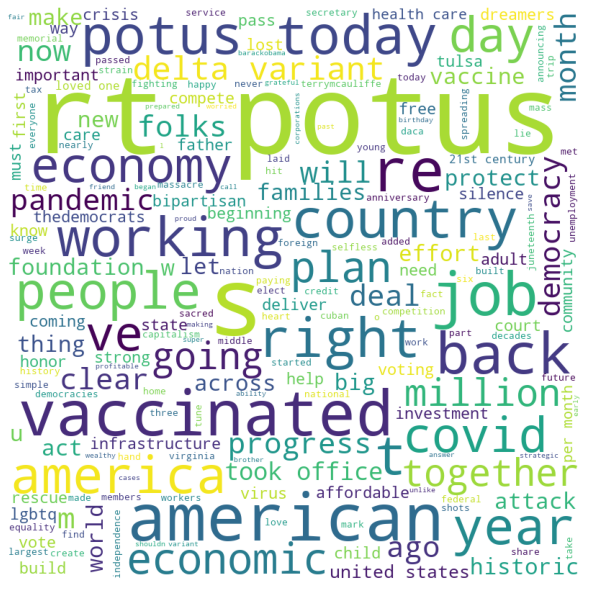

In [67]:
words(tweets_biden)

Let us look at the word cloud of Obama's tweets

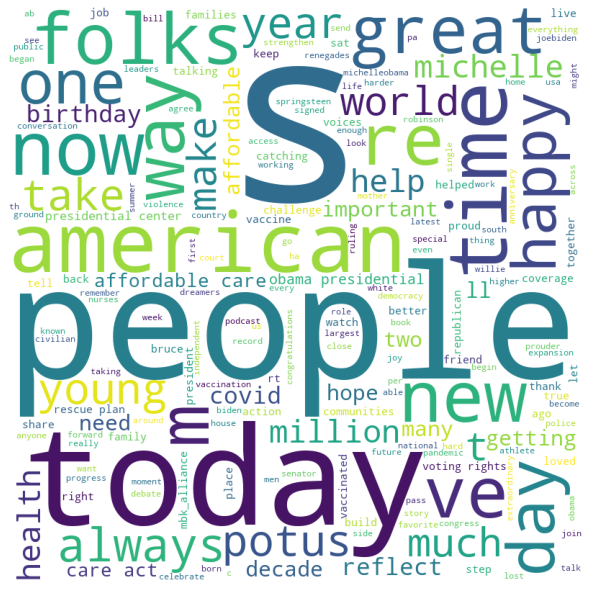

In [54]:
words(tweets_obama)

## Conclusion
From the analysis above, the statistics show that, although Biden is president, Obama seems to have more activity in terms of favorites and retweets. Biden, however, is slightly more active. The word clouds show that Biden is emphasizing the pandemic and bringing awareness. Obama also seems to care about the pandemic by using words like "people", "american" - which is used by both, "happy", "world".